In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def log_int_iterator(start, end, step):
    i = start
    while i <= end:
        yield int(i)
        i *= step

In [3]:
def range_stat(x):
    return x.max() - x.min()

In [4]:
mu = 0
sigma_1 = 1
sigma_2 = 5

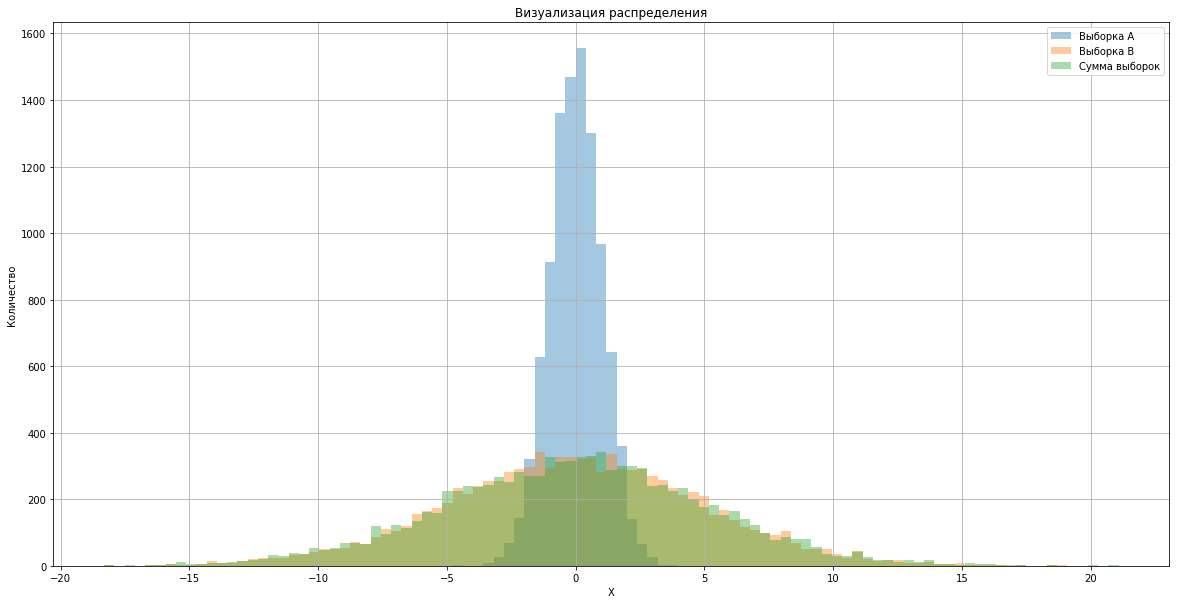

In [5]:
N = 10000
A = np.random.normal(mu, sigma_1, N)
B = np.random.normal(mu, sigma_2, N)
C = A + B 
bins = np.linspace(C.min(), C.max(), int(np.sqrt(N)))
alpha=0.4
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Визуализация распределения')
plt.hist(A, bins, alpha=alpha, label="Выборка A")
plt.hist(B, bins, alpha=alpha, label="Выборка B")
plt.hist(C, bins, alpha=alpha, label="Сумма выборок")
plt.xlabel('X')
plt.ylabel('Количество')
plt.legend()
plt.show()

In [37]:
result = pd.DataFrame(columns=['Median A', 'Median B', 'Median C',
                               'Range A', 'Range B', 'Range C',
                               'Mean A', 'Mean B', 'Mean C',
                               'Var A', 'Var B', 'Var C',])
#for N in log_int_iterator(10, 10240, 1.05):
for N in range(10, 10240, 10):
    np.random.seed(42)
    A = np.random.normal(mu, sigma_1, N)
    B = np.random.normal(mu, sigma_2, N)
    C = A + B    
    result.loc[N] = [np.median(A), np.median(B), np.median(C),
                    range_stat(A), range_stat(B), range_stat(C),
                    A.mean(), B.mean(), C.mean(),
                    np.var(A), np.var(B), np.var(C)]

In [38]:
result[::100]

,Median A,Median B,Median C,Range A,Range B,Range C,Mean A,Mean B,Mean C,Var A,Var B,Var C
10,0.519637,-3.675779,-3.265259,2.048687,11.137638,11.197414,0.448061,-3.953291,-3.505230,0.470467,12.836598,12.763909
1010,0.028532,0.210485,0.267241,7.093999,30.667481,33.199369,0.023965,0.281326,0.305291,0.954623,24.937472,26.024441
2010,0.042097,-0.007781,0.091803,7.093999,34.728749,38.300374,0.043457,-0.043908,-0.000451,0.975240,25.241760,26.086358
3010,0.024061,-0.111448,-0.122778,7.167505,32.098984,32.743352,0.031056,-0.185938,-0.154882,0.975015,25.369631,26.327598
4010,0.019382,-0.148699,-0.152904,7.167505,36.087102,36.272580,0.018183,-0.117013,-0.098830,0.994508,25.800221,26.844706
5010,0.012711,-0.081979,-0.086553,7.167505,37.257277,40.142859,0.005015,-0.045928,-0.040913,0.992350,25.506147,26.742361
6010,0.001158,-0.089475,-0.079825,7.167505,37.257277,38.196249,-0.003818,-0.041581,-0.045399,0.996361,25.209616,26.398277
7010,-0.007367,0.038503,0.003098,7.167505,36.756554,37.952269,-0.005729,0.031516,0.025787,1.004841,25.044219,26.041576
8010,-0.006296,0.047054,0.018841,7.614603,42.007423,41.754946,-0.002933,0.031884,0.028950,1.013859,24.955315,25.795756
9010,-0.003703,0.082069,0.052445,7.762893,42.007423,42.692143,-0.000889,0.050827,0.049938,1.015234,24.883855,25.888648


Медиана и среднее значение при увеличении размера выборки все ближе приближаются к среднему создаваемой выборки.
Это происходит, так как данных становится все больше и случайные помехи вносят меньший вклад.

При этом разброс выборок увеличивается с ростом числа итераций, так как вероятность встретить выброс увеличивается с ростом чистла записей.

Выборочная дисперсия на больших выборках приближается к коэффициенту дисперсии создаваемой выборки.

In [39]:
def MAE(y_true, y_exp):
    return abs(y_true - y_exp)

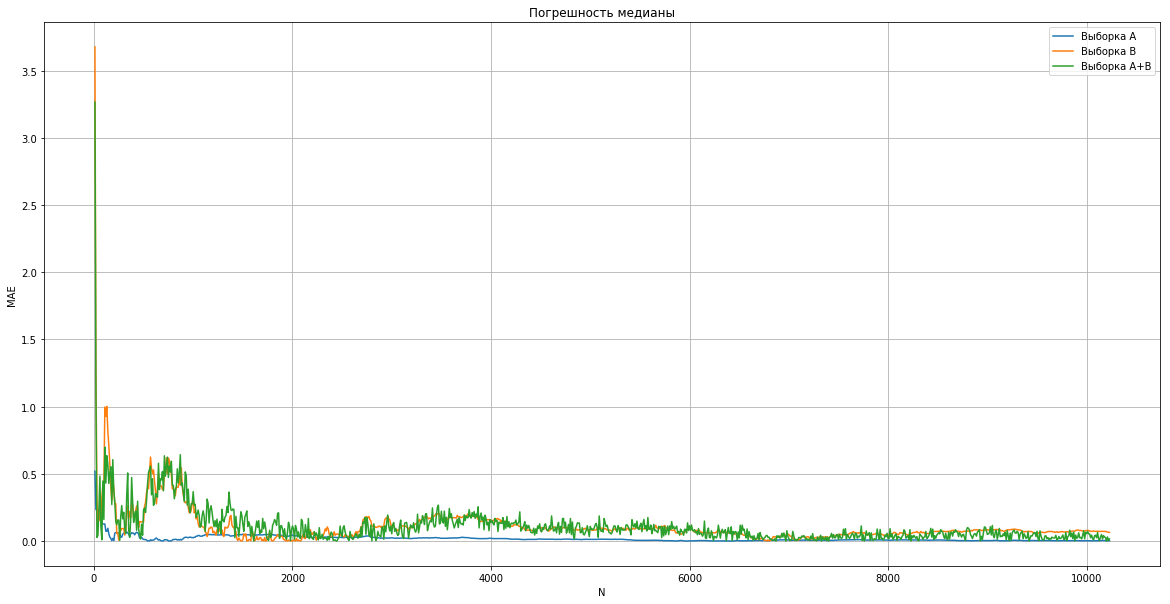

In [40]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Погрешность медианы')
plt.plot(MAE(mu, result["Median A"]), label="Выборка A")
plt.plot(MAE(mu, result["Median B"]), label="Выборка B")
plt.plot(MAE(mu, result["Median C"]), label="Выборка A+B")
plt.xlabel('N')
plt.ylabel('MAE')
plt.legend()
plt.show()

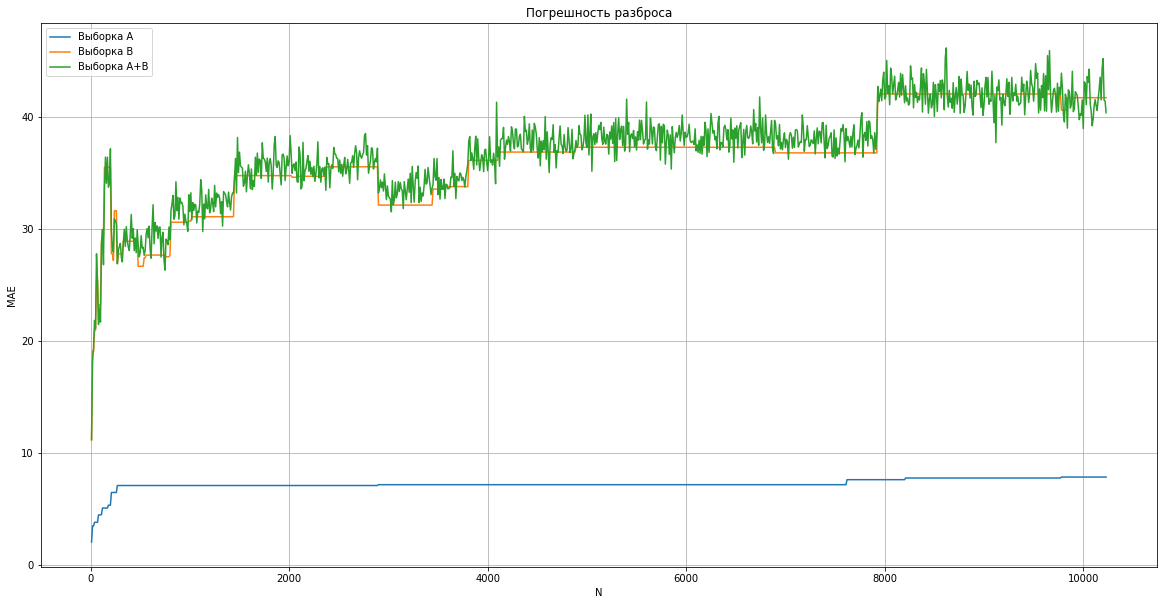

In [41]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Погрешность разброса')
plt.plot(MAE(mu, result["Range A"]), label="Выборка A")
plt.plot(MAE(mu, result["Range B"]), label="Выборка B")
plt.plot(MAE(mu, result["Range C"]), label="Выборка A+B")
plt.xlabel('N')
plt.ylabel('MAE')
plt.legend()
plt.show()

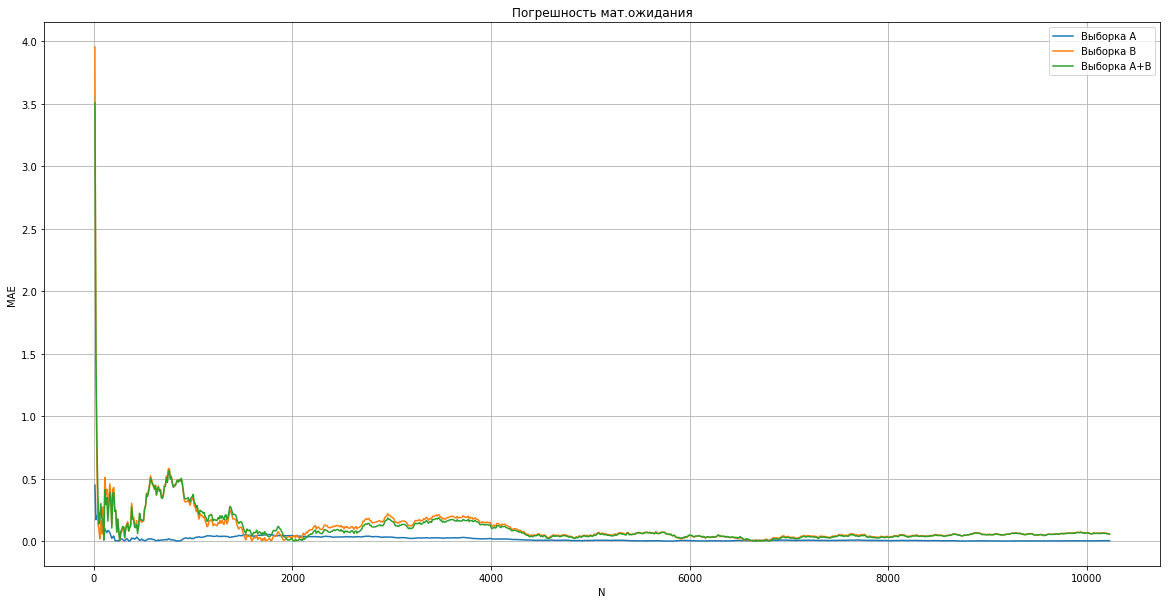

In [42]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Погрешность мат.ожидания')
plt.plot(MAE(mu, result["Mean A"]), label="Выборка A")
plt.plot(MAE(mu, result["Mean B"]), label="Выборка B")
plt.plot(MAE(mu, result["Mean C"]), label="Выборка A+B")
plt.xlabel('N')
plt.ylabel('MAE')
plt.legend()
plt.show()

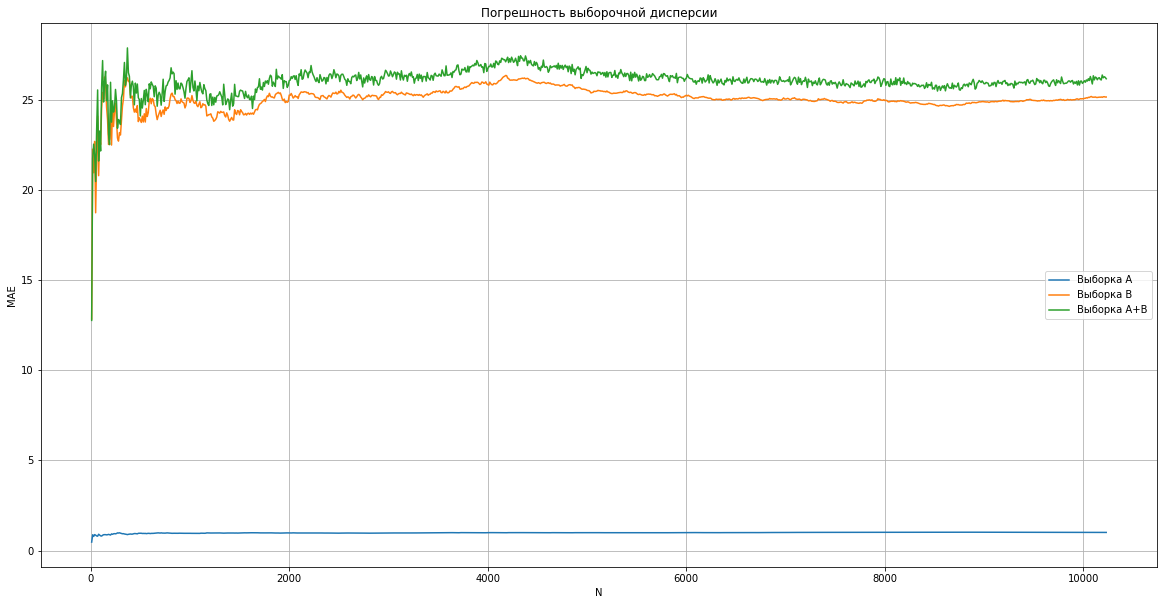

In [43]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Погрешность выборочной дисперсии')
plt.plot(MAE(mu, result["Var A"]), label="Выборка A")
plt.plot(MAE(mu, result["Var B"]), label="Выборка B")
plt.plot(MAE(mu, result["Var C"]), label="Выборка A+B")
plt.xlabel('N')
plt.ylabel('MAE')
plt.legend()
plt.show()